In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Helper function for PCA
# It returns a dataframe with all PCs along the same time series

def do_pca(df):
    # Standard Scaler
    ss = StandardScaler()
    set1_ss = ss.fit_transform(df)

    # PCA
    pca = PCA(random_state = 32)
    pc = pca.fit_transform(set1_ss)

    # Convert to DataFrame for plotting
    pc_df = pd.DataFrame(data=pc, 
                         columns=[f'PC{i+1}' for i in range(len(df.columns))],
                         index = df.index)

    # Print out the explained variance ratio of the first 3 PCs
    # It represents how much of the variance that each PC explains
    var_exp = pca.explained_variance_ratio_
    print(f'Explained variance (first 3 components): {np.round(var_exp[:3],3)}')

    # Print out the accumulating explained variance ratio of the first 3 PCs
    # It represents how much of the variance in total that the first 3 PCs explain
    cum_var_exp = np.cumsum(var_exp)
    print(f'Cumulative explained variance (first 3 components): {np.round(cum_var_exp[:3],3)}')

    # return the DataFrame for plotting
    return pc_df

def arrange_data(cluster):
    # Separate the cluster data into two different dictionaries for manipulation
    dict = {}
    for i in range(0, len(cluster)):
        data = [x for x in cluster.iloc[i].to_list() if str(x) != 'nan']
        dict[f'cluster{i+1}'] = data

    sets = {}
    for counter, c in enumerate(dict, 1):
        data = ccy[dict[c]]
        sets[f'set{counter}'] = data

    return dict, sets

def plot_pca(pc):
    pc_dict = {}
    for counter, pc in enumerate(pc):
        df = pd.DataFrame(data=pc,
                          columns=['PC1','PC2'],
                          index=pc.index)
        df['Combined_PC'] = df.sum(axis=1)
        plt.figure(figsize=(10,5))
        df['Combined_PC'].plot()
        plt.xlabel('date')
        plt.ylabel('PC1+PC2 equal weight')
        plt.title(f'PC1+PC2 for cluster {counter+1}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        pc_dict[f'cluster{counter+1}'] = df
    return pc_dict

In [2]:
# read data
price_cluster = pd.read_csv('../data/price_cluster.csv')
return_corr_cluster = pd.read_csv('../data/return_corr_cluster.csv')

ccy = pd.read_csv('../data/ccy1996_to_2023(c).csv')
ccy = ccy[313:]
ccy.set_index('Date', inplace=True)

In [3]:
price_dict, price_sets = arrange_data(price_cluster)

In [4]:
list_pc_price = []
for s in price_sets:
    print(f'PCA for {s}')
    pca = do_pca(price_sets[s])
    list_pc_price.append(pca)
    print(' ')

PCA for set1
Explained variance (first 3 components): [0.665 0.17  0.079]
Cumulative explained variance (first 3 components): [0.665 0.835 0.913]
 
PCA for set2
Explained variance (first 3 components): [0.881 0.081 0.032]
Cumulative explained variance (first 3 components): [0.881 0.962 0.993]
 
PCA for set3
Explained variance (first 3 components): [0.594 0.289 0.117]
Cumulative explained variance (first 3 components): [0.594 0.883 1.   ]
 
PCA for set4
Explained variance (first 3 components): [0.832 0.103 0.048]
Cumulative explained variance (first 3 components): [0.832 0.935 0.983]
 
PCA for set5
Explained variance (first 3 components): [0.834 0.063 0.051]
Cumulative explained variance (first 3 components): [0.834 0.897 0.948]
 


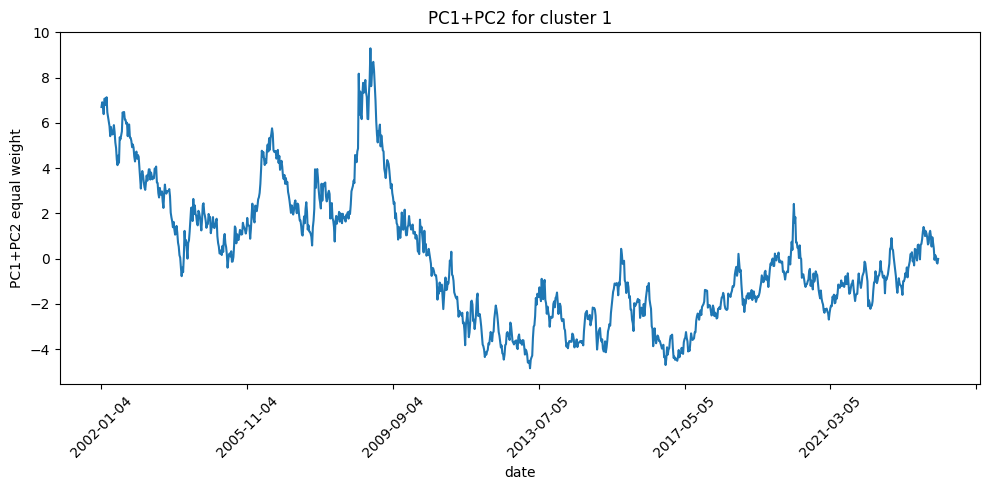

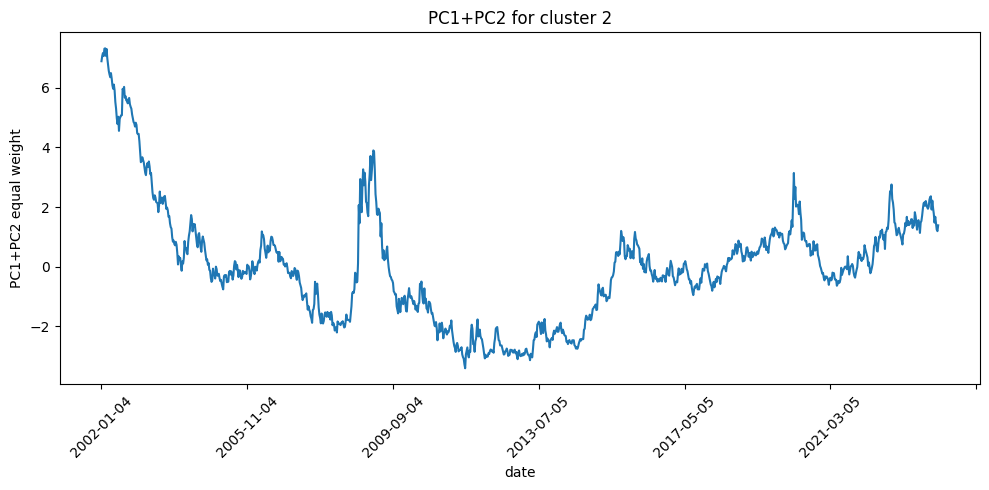

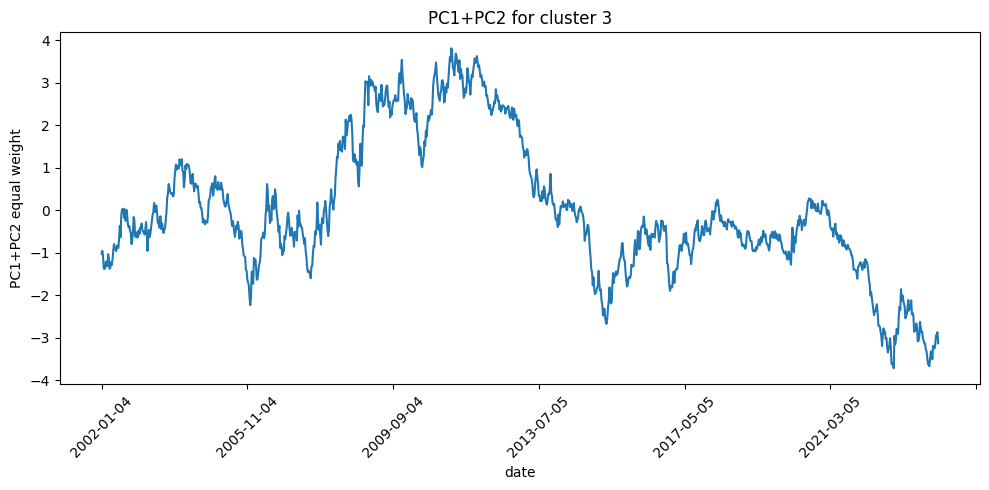

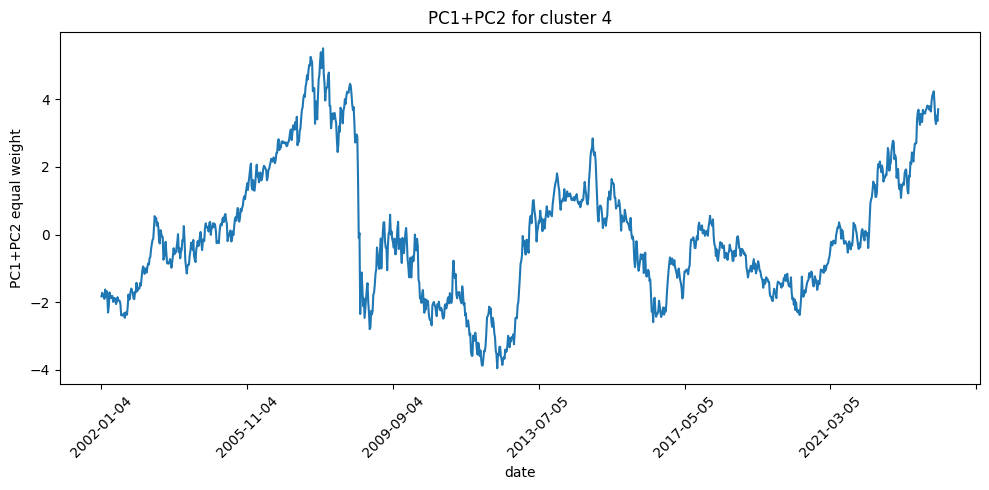

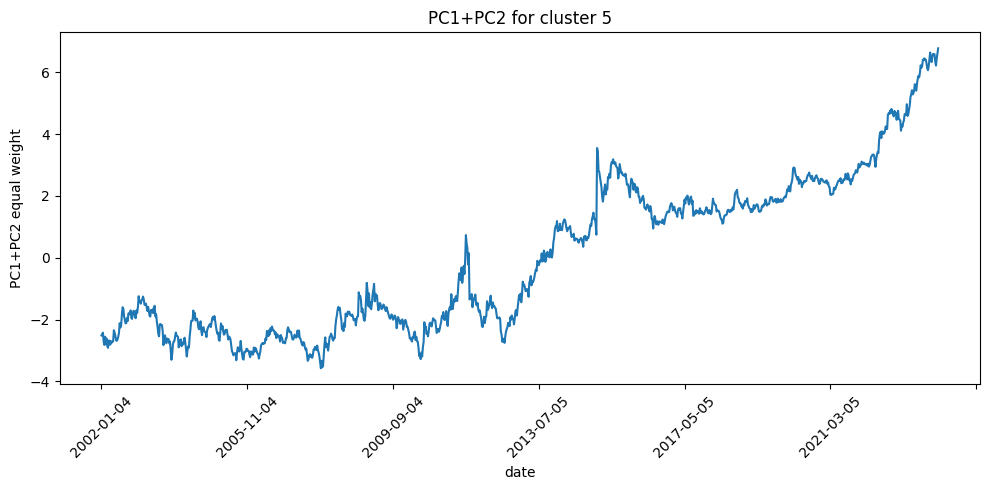

In [5]:
# Calculate the equally-weighted PC for the first two PCs
# Plot out this PC
# Save the respective PCs in different DataFrame for future use
price_pc = plot_pca(list_pc_price)

In [6]:
for i in price_dict:
    print(f'{i}: {price_dict[i]}')

cluster1: ['USDCHF', 'EURAUD', 'GBPAUD', 'AUDCAD', 'EURNZD', 'GBPNZD', 'NZDCAD', 'EURGBP', 'GBPCAD', 'GBPJPY']
cluster2: ['USDAUD', 'USDNZD', 'USDEUR', 'USDCAD']
cluster3: ['USDJPY', 'AUDNZD', 'EURCAD']
cluster4: ['AUDJPY', 'NZDJPY', 'EURJPY', 'CADJPY']
cluster5: ['USDGBP', 'AUDCHF', 'NZDCHF', 'EURCHF', 'GBPCHF', 'CADCHF', 'CHFJPY']


In [7]:
return_corr_dict, return_corr_sets = arrange_data(return_corr_cluster)

In [8]:
list_pc_return_corr = []
for s in return_corr_sets:
    print(f'PCA for {s}')
    pca = do_pca(return_corr_sets[s])
    list_pc_return_corr.append(pca)
    print(' ')

PCA for set1
Explained variance (first 3 components): [0.476 0.287 0.14 ]
Cumulative explained variance (first 3 components): [0.476 0.762 0.902]
 
PCA for set2
Explained variance (first 3 components): [0.837 0.116 0.028]
Cumulative explained variance (first 3 components): [0.837 0.953 0.981]
 
PCA for set3
Explained variance (first 3 components): [0.77  0.166 0.034]
Cumulative explained variance (first 3 components): [0.77  0.936 0.97 ]
 
PCA for set4
Explained variance (first 3 components): [0.559 0.274 0.113]
Cumulative explained variance (first 3 components): [0.559 0.833 0.947]
 


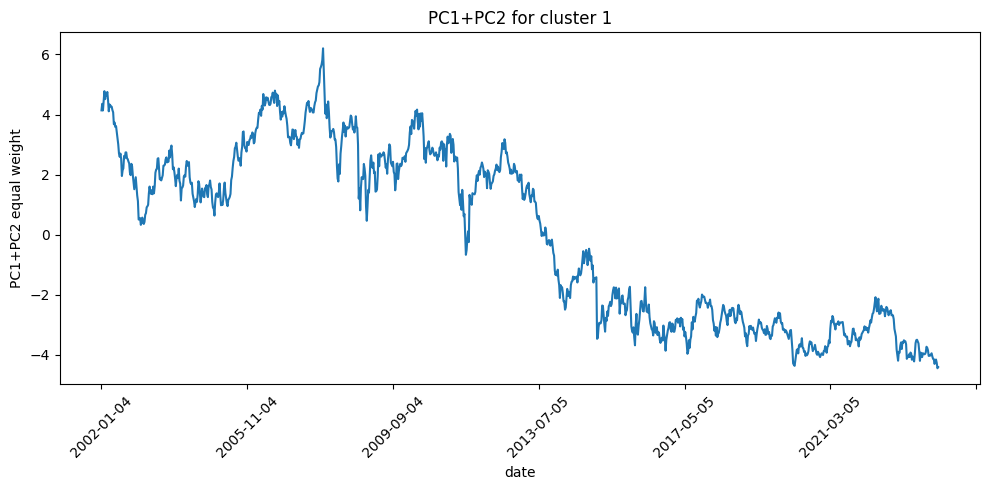

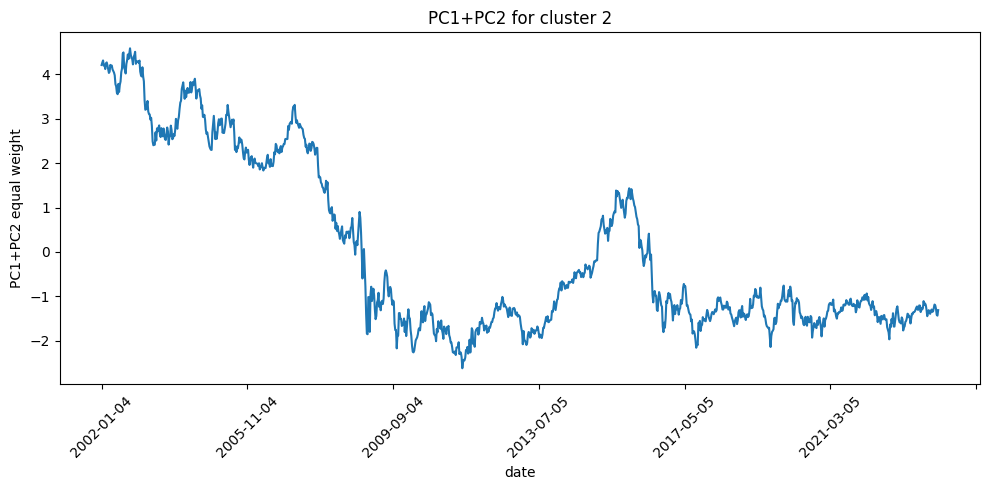

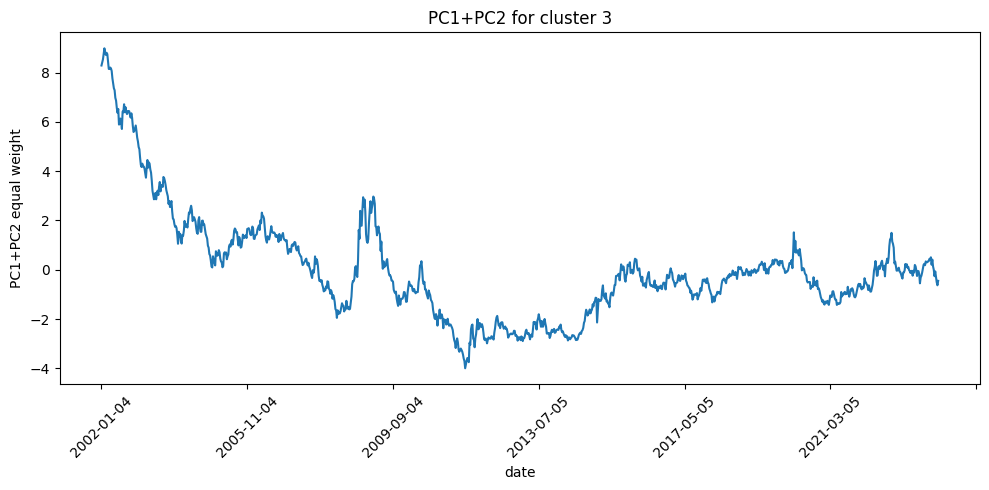

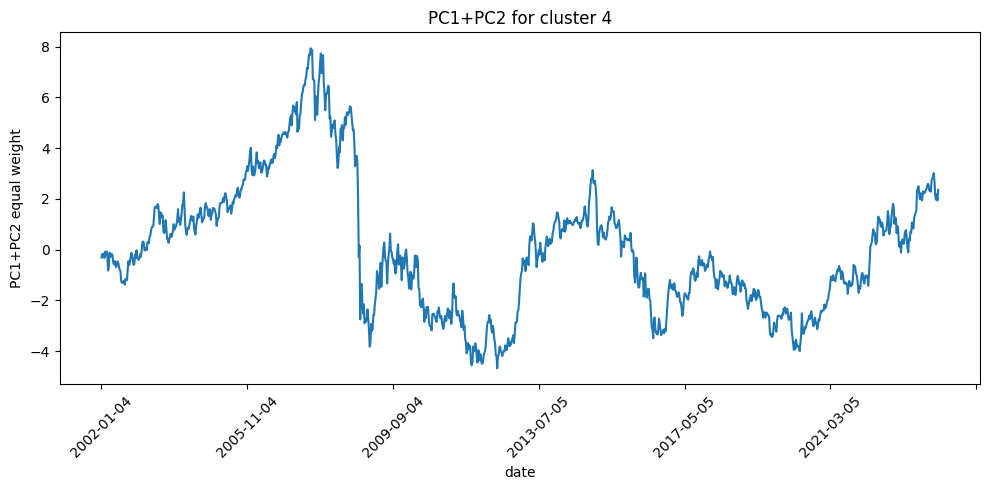

In [9]:
return_corr_pc = plot_pca(list_pc_return_corr)

In [10]:
for i in return_corr_dict:
    print(f'{i}: {return_corr_dict[i]}')

cluster1: ['AUDNZD', 'EURAUD', 'GBPAUD', 'AUDCAD', 'AUDCHF', 'EURNZD', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'EURCAD', 'CADCHF']
cluster2: ['USDGBP', 'EURGBP', 'GBPCAD', 'GBPCHF']
cluster3: ['USDAUD', 'USDNZD', 'USDEUR', 'USDCAD', 'USDCHF']
cluster4: ['USDJPY', 'AUDJPY', 'NZDJPY', 'EURCHF', 'EURJPY', 'GBPJPY', 'CADJPY', 'CHFJPY']
